In [76]:
import pandas as pd
import os
from jiwer import wer
from plotnine import *
from itertools import permutations
from matplotlib import pyplot as plt
plt.style.use('ggplot')

os.chdir('/project/graziul/')

In [3]:
df_transcripts = pd.read_csv('transcripts/transcripts2021_09_30.csv')
df_transcripts.head()

,feed,zone,year,month,day,time,sid,start,end,transcription,notes,file,transcriber,start_c,start_dt,end_c,end_dt,length
0,27730,Zone1,2018,8,12,932,RADIO,141.252,151.279,RADIOSHOP TESTING ONE TWO THREE FOUR FIVE FIVE...,NaN,201808120932-28710-27730ah.xlsx,huthealex,00.02.21.252,1900-01-01 00:02:21.252000,00.02.31.279,1900-01-01 00:02:31.279000,10.027
1,27730,Zone1,2018,8,12,932,RADIO,158.109,159.417,ONE TWO ONE TWO,NaN,201808120932-28710-27730ah.xlsx,huthealex,00.02.38.109,1900-01-01 00:02:38.109000,00.02.39.417,1900-01-01 00:02:39.417000,1.308
2,27730,Zone1,2018,8,12,932,UNIT,168.327,169.235,UNIT COMING IN,NaN,201808120932-28710-27730ah.xlsx,huthealex,00.02.48.327,1900-01-01 00:02:48.327000,00.02.49.235,1900-01-01 00:02:49.235000,0.908
3,27730,Zone1,2018,8,12,932,UNIT,175.330,177.437,ZONE ONE IS ON CITY [WIDE] FIVE,NaN,201808120932-28710-27730ah.xlsx,huthealex,00.02.55.330,1900-01-01 00:02:55.330000,00.02.57.437,1900-01-01 00:02:57.437000,2.107
4,27730,Zone1,2018,8,12,932,RADIO,184.003,189.017,OKAY THANKS UH THIS IS THE RADIO SHOP TESTING ...,NaN,201808120932-28710-27730ah.xlsx,huthealex,00.03.04.003,1900-01-01 00:03:04.003000,00.03.09.017,1900-01-01 00:03:09.017000,5.014


In [113]:
# Extract filename and transcriber into separate columns, remove 'xxx'
df_transcripts[['filename','transcriber']] = df_transcripts['file'].str.split('(\d*-\d*-\d*)',expand=True)[[1,2]]
def remove_filetype(x):
    y = x.replace('.xlsx','')
    y = y.replace('.txt','')
    z = y.replace('_','')
    return z
df_transcripts['transcriber'] = df_transcripts['transcriber'].apply(lambda x: remove_filetype(x))
df_transcripts['transcriber'] = df_transcripts['transcriber'].str.lower().str.strip()
df_transcripts = df_transcripts[df_transcripts['transcriber']!='xxx']

In [114]:
# Count of utterances by transcriber
df_transcripts['transcriber'].value_counts()

sj     11675
wpd     6336
his     4875
ahs     4322
mgw     3380
tjs     3262
mh      2974
jar     2508
rah     2354
mcm     1757
kjc     1565
wam     1416
aek     1387
ah      1376
rc       674
oaa      515
xz       383
kk       353
kw       223
Name: transcriber, dtype: int64

In [115]:
# Count of utterances by filename
df_transcripts['filename'].value_counts()

201808050001-100238-27730    1122
201808042331-339616-27730     772
201808100932-407300-27158     721
201808101132-852196-27158     699
201808101032-781791-27158     648
                             ... 
201808120633-901759-27730      28
201808050858-692772-27730      26
201808121032-648578-27730      23
201808100404-696965-27158      15
201808120902-41159-27730        8
Name: filename, Length: 219, dtype: int64

<AxesSubplot:>

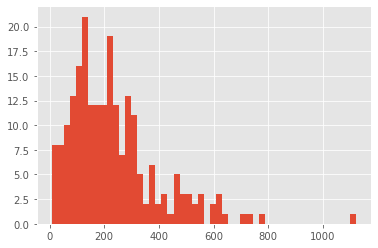

In [116]:
# Frequency of utterances by filename
df_transcripts.groupby(['filename'])['filename'].count().hist(bins=50)

In [94]:
df_transcripts.groupby(['filename']).count()

,feed,zone,year,month,day,time,sid,start,end,transcription,notes,file,transcriber,start_c,start_dt,end_c,end_dt,length,tclean
filename,,,,,,,,,,,,,,,,,,,
201808042331-339616-27730,772,772,772,772,772,772,772,772,772,772,140,772,772,772,772,772,772,772,772
201808050001-100238-27730,1122,1122,1122,1122,1122,1122,1122,1122,1122,1122,178,1122,1122,1122,1122,1122,1122,1122,1122
201808050031-739899-27730,529,529,529,529,529,529,529,529,529,529,75,529,529,529,529,529,529,529,529
201808050100-298054-27730,597,597,597,597,597,597,597,597,597,597,119,597,597,597,597,597,597,597,597
201808050130-950381-27730,564,564,564,564,564,564,564,564,564,564,87,564,564,564,564,564,564,564,564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808130725-631742-27730,210,210,210,210,210,210,209,210,210,210,93,210,210,210,210,210,210,210,210
201808130755-832378-27730,321,321,321,321,321,321,321,321,321,321,142,321,321,321,321,321,321,321,321
201808130825-776116-27730,30,30,30,30,30,30,30,30,30,30,14,30,30,30,30,30,30,30,30


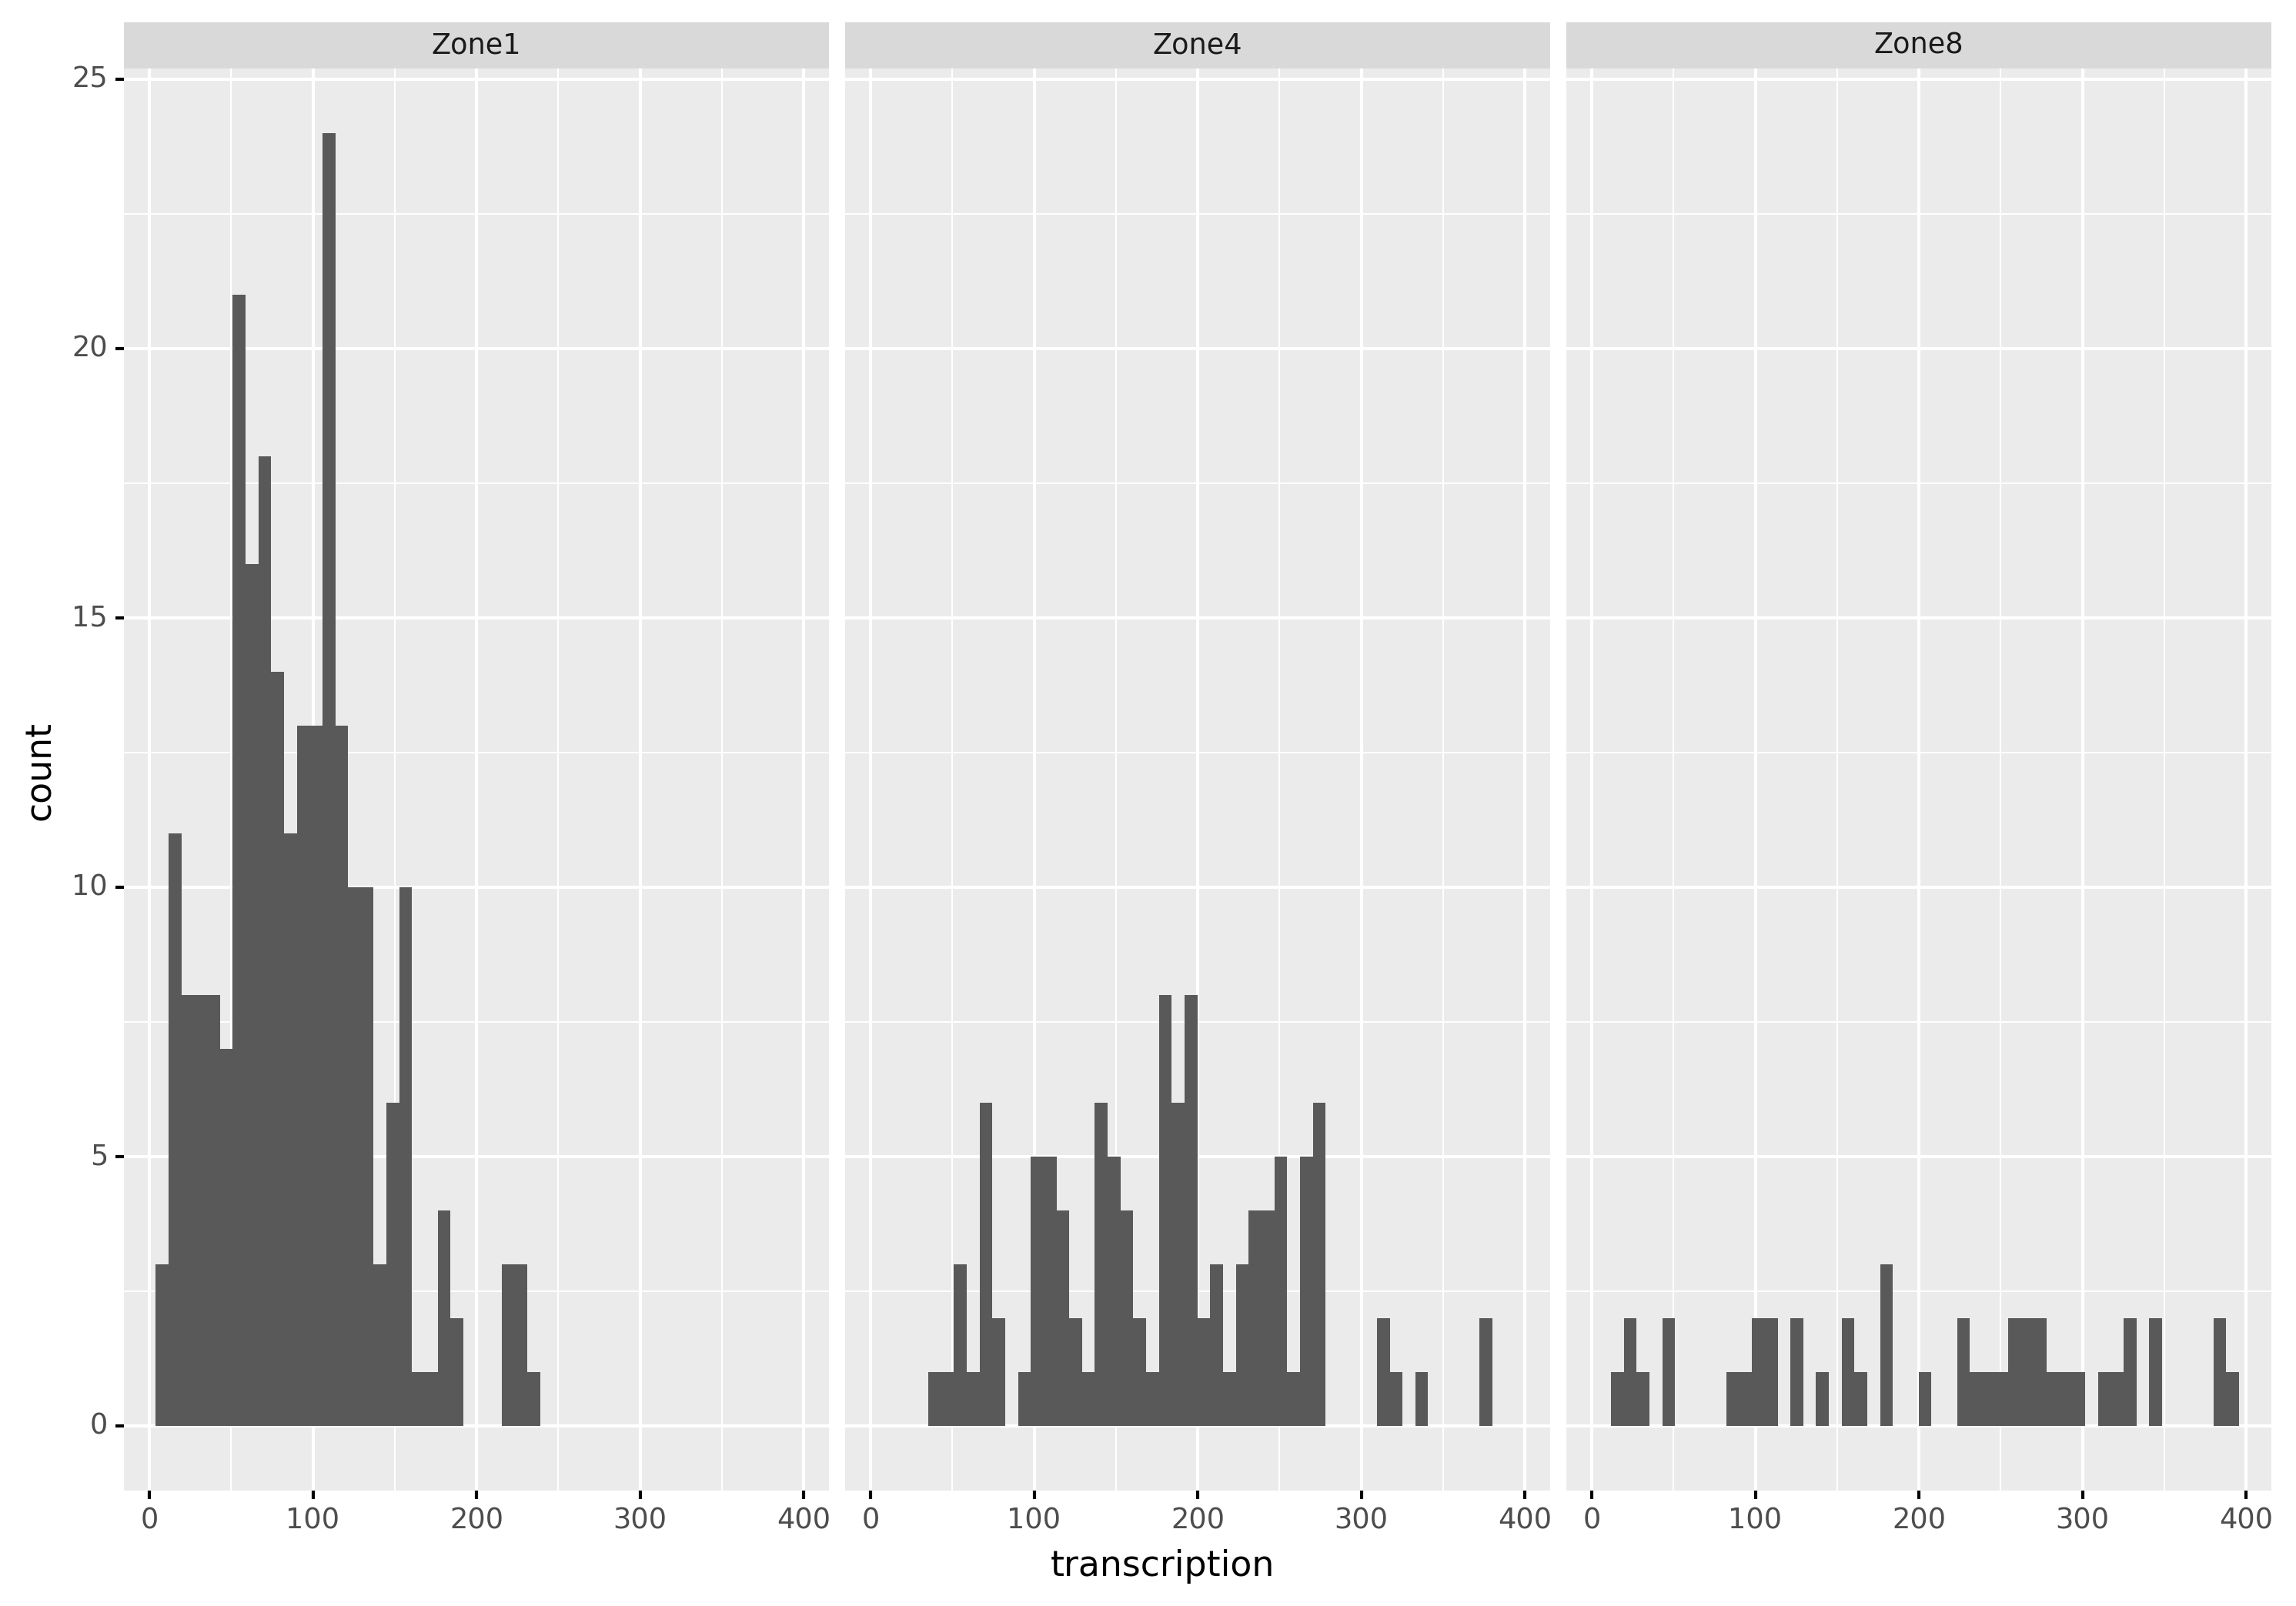

<ggplot: (8743619265046)>

In [127]:
df_num_utts = df_transcripts.groupby(['filename','transcriber','zone','day'])['transcription'].count().reset_index()
p = ggplot(df_num_utts, aes(x='transcription'))
p + geom_histogram(bins=50) + facet_wrap('zone') + theme(figure_size=(12,8),
                                                                dpi=300)

In [128]:
df_num_utts[df_num_utts['transcription']==df_num_utts['transcription'].max()]

,filename,transcriber,zone,day,transcription
149,201808100932-407300-27158,wpd,Zone8,10,388


In [129]:
df_num_utts[df_num_utts['filename']=='201808100932-407300-27158']

,filename,transcriber,zone,day,transcription
148,201808100932-407300-27158,sj,Zone8,10,333
149,201808100932-407300-27158,wpd,Zone8,10,388


In [130]:
df_num_utt_by_fileXtranscriber = df_transcripts.groupby(['filename','transcriber'])['transcription'].count().reset_index()
df_num_utt_by_fileXtranscriber

,filename,transcriber,transcription
0,201808042331-339616-27730,aek,152
1,201808042331-339616-27730,kjc,153
2,201808042331-339616-27730,mgw,161
3,201808042331-339616-27730,mh,152
4,201808042331-339616-27730,wam,154
...,...,...,...
394,201808130825-776116-27730,wpd,15
395,201808130854-145935-27730,his,45
396,201808130854-145935-27730,wpd,49
397,201808130924-30969-27730,his,18


In [9]:
df_num_utt_by_file_descriptives = df_num_utt_by_fileXtranscriber.groupby('filename').describe()
df_num_utt_by_file_descriptives[('transcription','iqr')] = df_num_utt_by_file_descriptives[('transcription','75%')] - df_num_utt_by_file_descriptives[('transcription','25%')]
df_num_utt_by_file_descriptives[('transcription','range')] = df_num_utt_by_file_descriptives[('transcription','max')] - df_num_utt_by_file_descriptives[('transcription','min')]
df_num_utt_by_file_descriptives[('transcription','cov')] = df_num_utt_by_file_descriptives[('transcription','std')]/df_num_utt_by_file_descriptives[('transcription','mean')]
df_num_utt_by_file_descriptives[('transcription','cov2')] = df_num_utt_by_file_descriptives[('transcription','iqr')]/df_num_utt_by_file_descriptives[('transcription','50%')]
df_num_utt_by_file_descriptives.head()

transcription                                        \
                                  count   mean       std    min    25%    50%   
filename                                                                        
201808042331-339616-27730           5.0  154.4  3.781534  152.0  152.0  153.0   
201808050001-100238-27730           5.0  224.4  6.228965  219.0  220.0  221.0   
201808050031-739899-27730           5.0  105.8  3.633180  103.0  104.0  104.0   
201808050100-298054-27730           5.0  119.4  2.701851  117.0  118.0  119.0   
201808050130-950381-27730           5.0  112.8  2.387467  111.0  112.0  112.0   

                                                                        
                             75%    max  iqr range       cov      cov2  
filename                                                                
201808042331-339616-27730  154.0  161.0  2.0   9.0  0.024492  0.013072  
201808050001-100238-27730  229.0  233.0  9.0  14.0  0.027758  0.040724  
201808050031-739899-27730  106.0  112.0  2.0   9.0  0.034340  0.019231  
201808050100-298054-27730  119.0  124.0  1.0   7.0  0.022629  0.008403  
201808050130-950381-27730  112.0  117.0  0.0   6.0  0.021165  0.000000

array([[<AxesSubplot:title={'center':"('transcription', 'iqr')"}>,
        <AxesSubplot:title={'center':"('transcription', 'range')"}>],
       [<AxesSubplot:title={'center':"('transcription', 'cov')"}>,
        <AxesSubplot:title={'center':"('transcription', 'cov2')"}>]],
      dtype=object)

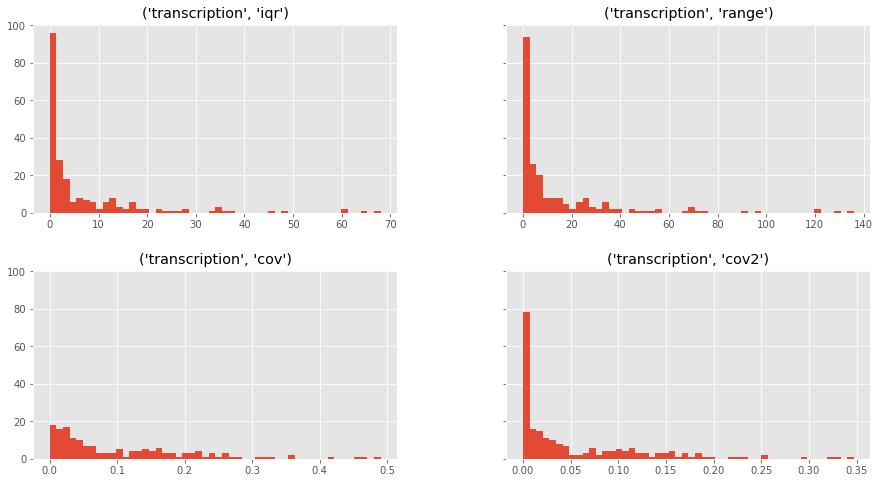

In [157]:
df_num_utt_by_file_descriptives.hist(column=[('transcription','iqr'),
                                             ('transcription','range'),
                                             ('transcription','cov'),
                                             ('transcription','cov2')],
                                    bins=50,
                                    figsize=(15,8),
                                    sharey=True)

array([[<AxesSubplot:title={'center':"('transcription', 'iqr')"}>,
        <AxesSubplot:title={'center':"('transcription', 'range')"}>]],
      dtype=object)

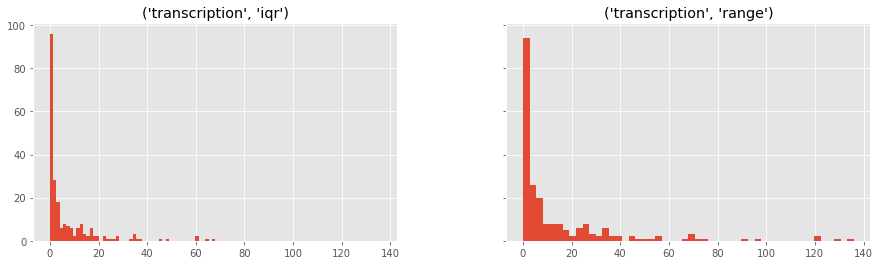

In [158]:
# IQR and range in number of utterances per file
df_num_utt_by_file_descriptives.hist(column=[('transcription','iqr'),
                                             ('transcription','range')],
                                    bins=50,
                                    figsize=(15,4),
                                    sharey=True,
                                    sharex=True)

<AxesSubplot:>

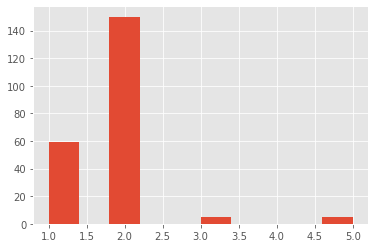

In [159]:
# Number of transcriptions per file
df_num_utt_by_file_descriptives[('transcription','count')].hist()

<AxesSubplot:>

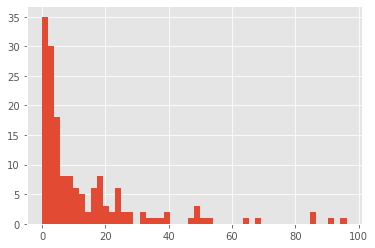

In [160]:
# Standard deviation in number of utterances
df_num_utt_by_file_descriptives[('transcription','std')].hist(bins=50)

<AxesSubplot:>

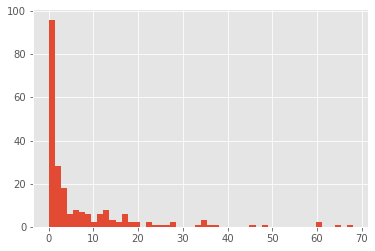

In [161]:
# Interquartile range in number of utterances
df_num_utt_by_file_descriptives[('transcription','iqr')].hist(bins=50)

In [15]:
df_num_utt_by_file_descriptives[df_num_utt_by_file_descriptives[('transcription','iqr')]>10]

transcription                                   \
                                  count   mean        std    min     25%   
filename                                                                   
201808050758-615610-27730           2.0   49.0  24.041631   32.0   40.50   
201808050828-792675-27730           2.0  116.0  28.284271   96.0  106.00   
201808100300-456014-26296           2.0  155.5  37.476659  129.0  142.25   
201808100330-109122-26296           2.0   63.5  16.263456   52.0   57.75   
201808100400-756911-26296           2.0  132.0  32.526912  109.0  120.50   
201808100430-731508-26296           2.0   92.0  15.556349   81.0   86.50   
201808100434-616279-27158           2.0  142.5  51.618795  106.0  124.25   
201808100500-897797-26296           2.0   82.5  17.677670   70.0   76.25   
201808100600-503369-26296           2.0   60.5  19.091883   47.0   53.75   
201808100629-146135-26296           2.0   54.5  17.677670   42.0   48.25   
201808100633-50058-27158            2.0  140.5  21.920310  125.0  132.75   
201808100859-179195-26296           2.0  235.0  52.325902  198.0  216.50   
201808100928-196855-26296           2.0  245.5  26.162951  227.0  236.25   
201808100932-407300-27158           2.0  360.5  38.890873  333.0  346.75   
201808100958-833870-26296           2.0  302.5  48.790368  268.0  285.25   
201808101002-723724-27158           2.0  124.5  21.920310  109.0  116.75   
201808101028-67528-26296            2.0  313.0  84.852814  253.0  283.00   
201808101032-781791-27158           2.0  324.0  84.852814  264.0  294.00   
201808101058-599277-26296           2.0  224.0  39.597980  196.0  210.00   
201808101102-932251-27158           2.0  280.0  19.798990  266.0  273.00   
201808101128-78055-26296            2.0  169.5  31.819805  147.0  158.25   
201808101132-852196-27158           2.0  349.5  48.790368  315.0  332.25   
201808101158-162036-26296           2.0  255.0  91.923882  190.0  222.50   
201808101227-553095-26296           2.0  227.0  63.639610  182.0  204.50   
201808101955-415523-26296           2.0  311.0  96.166522  243.0  277.00   
201808102025-544061-26296           2.0  231.0  46.669048  198.0  214.50   
201808102055-546914-26296           2.0  205.0  28.284271  185.0  195.00   
201808102124-347825-26296           2.0  142.0  19.798990  128.0  135.00   
201808110253-161076-26296           2.0  104.0  48.083261   70.0   87.00   
201808110352-116394-26296           2.0  150.0  67.882251  102.0  126.00   
201808110452-623962-26296           2.0   80.5  33.234019   57.0   68.75   
201808111737-609665-27730           2.0  104.0  16.970563   92.0   98.00   
201808111807-883152-27730           2.0   88.5  19.091883   75.0   81.75   
201808111837-315775-27730           2.0  152.5  34.648232  128.0  140.25   
201808111907-423587-27730           2.0   98.0  15.556349   87.0   92.50   
201808111937-459173-27730           2.0  136.5  24.748737  119.0  127.75   
201808112306-56206-27730            2.0  123.0  18.384776  110.0  116.50   
201808112335-560782-27730           2.0  107.0  24.041631   90.0   98.50   
201808120005-475816-27730           2.0  122.0  15.556349  111.0  116.50   
201808120135-851247-27730           2.0  108.5  17.677670   96.0  102.25   
201808120205-953882-27730           2.0  114.0  26.870058   95.0  104.50   
201808120234-654163-27730           2.0   93.5  24.748737   76.0   84.75   
201808120304-366043-27730           2.0   96.0  19.798990   82.0   89.00   
201808120803-891554-27730           2.0  114.5  16.263456  103.0  108.75   
201808121729-506899-27730           2.0  115.5  14.849242  105.0  110.25   
201808130057-745305-27730           2.0  140.5  17.677670  128.0  134.25   
201808130127-741490-27730           2.0  158.5  23.334524  142.0  150.25   
201808130157-112246-27730           2.0  111.0  18.384776   98.0  104.50   
201808130755-832378-27730           2.0  160.5  24.748737  143.0  151.75   

                                                                        \

<AxesSubplot:>

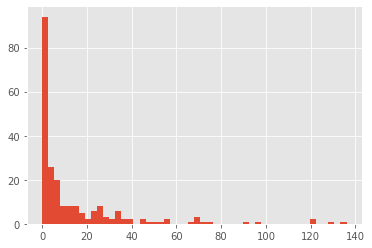

In [156]:
# Range in number of identified utterances has long tail - why? 
df_num_utt_by_file_descriptives[('transcription','range')].hist(bins=50)

In [17]:
df_num_utt_by_file_descriptives[df_num_utt_by_file_descriptives[('transcription','range')]>10]

transcription                                   \
                                  count   mean        std    min     25%   
filename                                                                   
201808050001-100238-27730           5.0  224.4   6.228965  219.0  220.00   
201808050459-276291-27730           3.0   95.0   7.211103   87.0   92.00   
201808050758-615610-27730           2.0   49.0  24.041631   32.0   40.50   
201808050828-792675-27730           2.0  116.0  28.284271   96.0  106.00   
201808092351-896112-27730           2.0  185.0   8.485281  179.0  182.00   
...                                 ...    ...        ...    ...     ...   
201808130057-745305-27730           2.0  140.5  17.677670  128.0  134.25   
201808130127-741490-27730           2.0  158.5  23.334524  142.0  150.25   
201808130157-112246-27730           2.0  111.0  18.384776   98.0  104.50   
201808130725-631742-27730           2.0  105.0  11.313708   97.0  101.00   
201808130755-832378-27730           2.0  160.5  24.748737  143.0  151.75   

                                                                       \
                             50%     75%    max   iqr range       cov   
filename                                                                
201808050001-100238-27730  221.0  229.00  233.0   9.0  14.0  0.027758   
201808050459-276291-27730   97.0   99.00  101.0   7.0  14.0  0.075906   
201808050758-615610-27730   49.0   57.50   66.0  17.0  34.0  0.490646   
201808050828-792675-27730  116.0  126.00  136.0  20.0  40.0  0.243830   
201808092351-896112-27730  185.0  188.00  191.0   6.0  12.0  0.045866   
...                          ...     ...    ...   ...   ...       ...   
201808130057-745305-27730  140.5  146.75  153.0  12.5  25.0  0.125820   
201808130127-741490-27730  158.5  166.75  175.0  16.5  33.0  0.147221   
201808130157-112246-27730  111.0  117.50  124.0  13.0  26.0  0.165629   
201808130725-631742-27730  105.0  109.00  113.0   8.0  16.0  0.107750   
201808130755-832378-27730  160.5  169.25  178.0  17.5  35.0  0.154198   

                                     
                               cov2  
filename                             
201808050001-100238-27730  0.040724  
201808050459-276291-27730  0.072165  
201808050758-615610-27730  0.346939  
201808050828-792675-27730  0.172414  
201808092351-896112-27730  0.032432  
...                             ...  
201808130057-745305-27730  0.088968  
201808130127-741490-27730  0.104101  
201808130157-112246-27730  0.117117  
201808130725-631742-27730  0.076190  
201808130755-832378-27730  0.109034  

[71 rows x 12 columns]

In [18]:
# Number unique file names
filenames = df_transcripts['filename'].unique().tolist()
len(filenames)

219

In [19]:
# Number unique transcriptions (should be ~2x number unique file names)
len(df_transcripts['file'].unique())

399

In [20]:
df_transcripts.columns.values

array(['feed', 'zone', 'year', 'month', 'day', 'time', 'sid', 'start',
       'end', 'transcription', 'notes', 'file', 'transcriber', 'start_c',
       'start_dt', 'end_c', 'end_dt', 'length', 'filename'], dtype=object)

In [66]:
def remove_irrelevant(x):
    x = str(x)
    x = x.replace("\[Uncertain\]","")
    x = x.replace("INAUDIBLE","")    
    x = x.replace("<X>","")
    x = ' '.join(x.split())
    x = ''.join([i for i in x if i.isalnum() or i==' '])
    x = x.strip()
    x = x.upper()
    return x

In [135]:
def get_wer(text_ref, text_hyp, measure='word'):
    if measure=='word':
        return wer('#'.join(text_ref), '#'.join(text_hyp))
    if measure=='char':
        return wer([i for i in '#'.join(text_ref)], [i for i in '#'.join(text_hyp)])

In [165]:
def get_wer_for_file(df, mp3_file, measure='word'):
    df_temp = df[df['filename']==mp3_file].copy()
    transcribers = df_temp['transcriber'].unique()
    # Only process if more than one transcriber/transcription
    if len(transcribers)>1:
        er_list = []
        for t in set(permutations(transcribers,2)):
            transcriber_reference = t[0]
            transcriber_hypothesis = t[1]
            df_temp.loc[:,('text')] = df_temp['transcription'].apply(remove_irrelevant)
            text_ref = df_temp.loc[df_temp['transcriber']==transcriber_reference,'text'].tolist()
            text_hyp = df_temp.loc[df_temp['transcriber']==transcriber_hypothesis,'text'].tolist()
            er = [mp3_file, transcriber_reference, transcriber_hypothesis, get_wer(text_ref, text_hyp, measure)]
            er_list.append(er)
        return er_list
    else:
        return []

In [180]:
def get_wer_by_file(df, mp3_files, measure='word'):
    er_list = []
    if type(mp3_files)==list:
        for mp3_file in mp3_files:
            er_list += get_wer_for_file(df, mp3_file, measure)
    if type(mp3_files)==str:
        mp3_file = mp3_files
        er_list += get_wer_for_file(df, mp3_file, measure)
    df_er = pd.DataFrame(er_list, columns = ['filename','ref','hyp','error_rate'])
    df_er['measure'] = measure
    return df_er

In [192]:
#df_transcripts.groupby('transcriber')['filename'].count(scale=True)

TypeError: count() got an unexpected keyword argument 'scale'

In [181]:
df_wer = get_wer_by_file(df_transcripts, filenames)
df_wer.head()

,filename,ref,hyp,error_rate,measure
0,201808120932-28710-27730,ah,mh,0.360360,word
1,201808120932-28710-27730,mh,ah,0.305344,word
2,201808120304-366043-27730,ah,mcm,0.407631,word
3,201808120304-366043-27730,mcm,ah,0.386667,word
4,201808120902-41159-27730,ah,mh,0.138889,word


<AxesSubplot:>

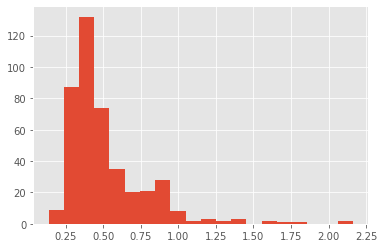

In [182]:
df_wer['error_rate'].hist(bins=20)

In [187]:
df_wer['error_rate'].describe()

count    430.000000
mean       0.517421
std        0.271267
min        0.135135
25%        0.344376
50%        0.432624
75%        0.606214
max        2.162162
Name: error_rate, dtype: float64

<AxesSubplot:>

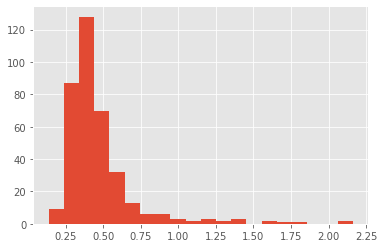

In [198]:
df_wer_noaek = df_wer.loc[(df_wer['ref']!='aek') & (df_wer['hyp']!='aek')].copy()
df_wer_noaek['error_rate'].hist(bins=20)

In [222]:
df_wer_noaek['error_rate'].describe()

count    370.000000
mean       0.475569
std        0.262474
min        0.135135
25%        0.336143
50%        0.408208
75%        0.512353
max        2.162162
Name: error_rate, dtype: float64

/home/graziul/.conda/envs/deepspeech/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


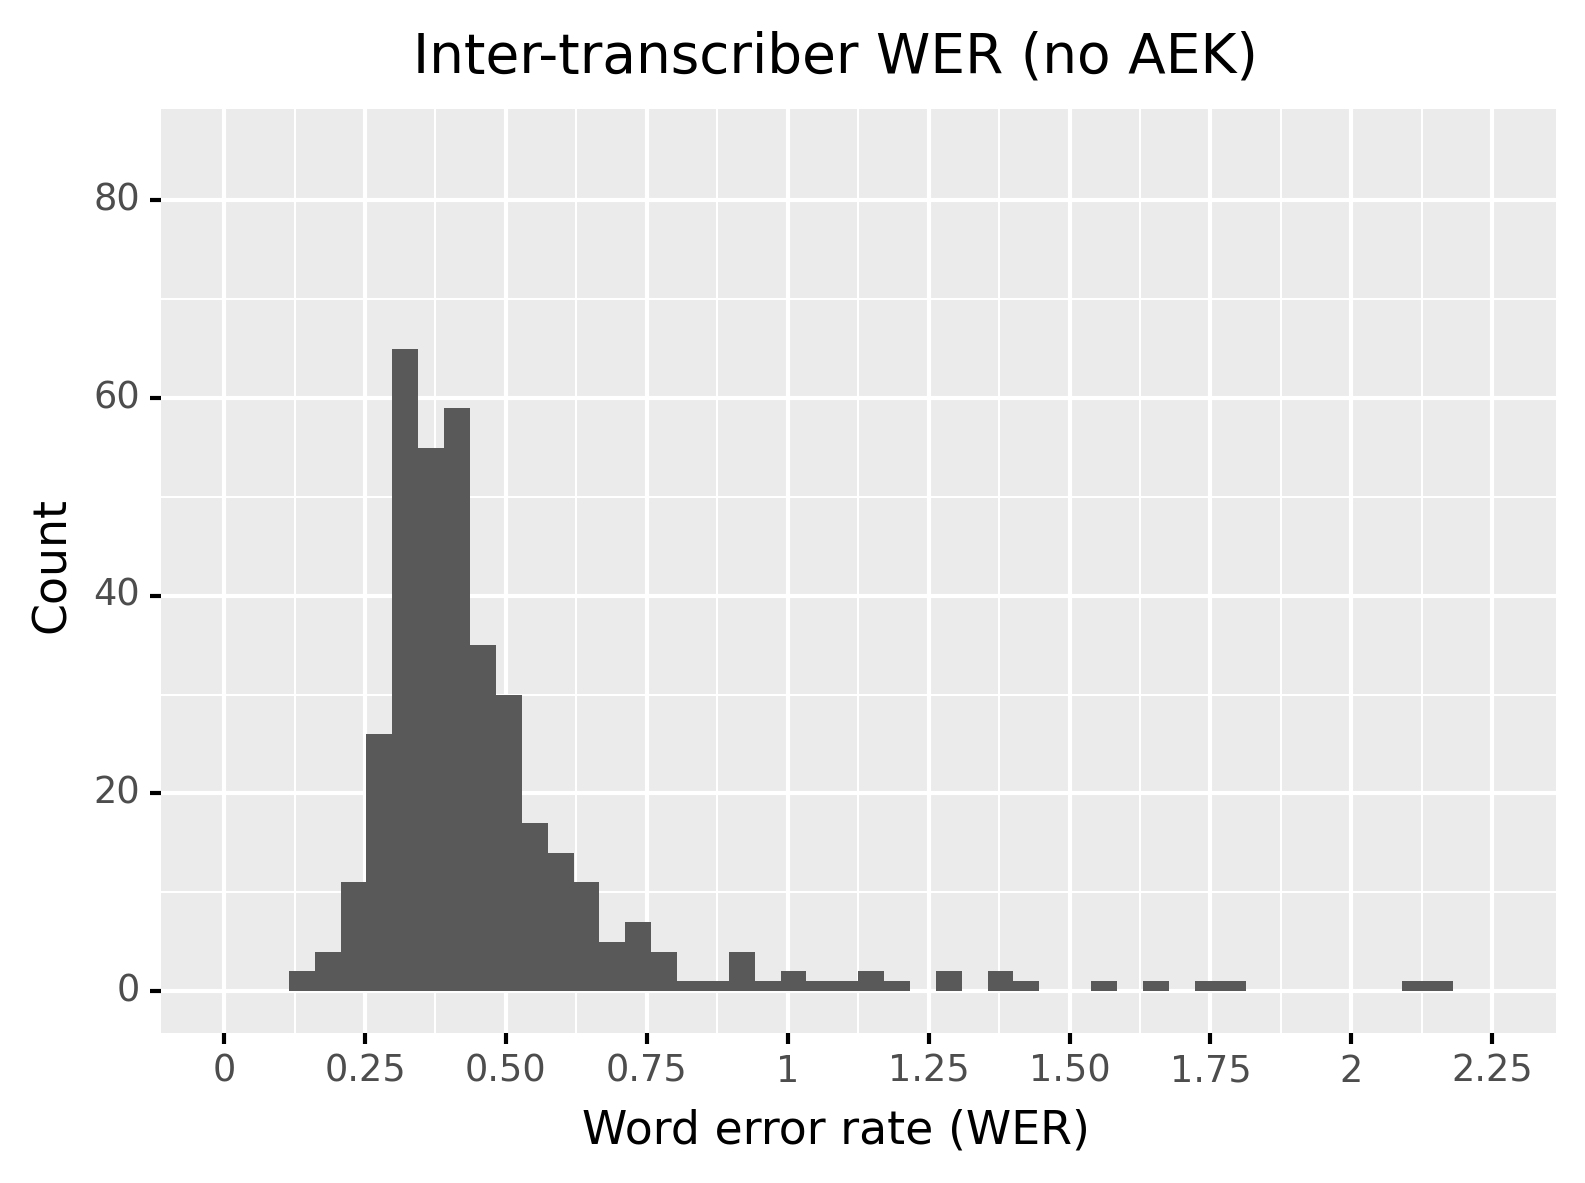

<ggplot: (8743615615223)>

In [235]:
p = ggplot(df_wer_noaek, aes(x='error_rate')) + xlab('Word error rate (WER)') + ylab('Count') + ggtitle('Inter-transcriber WER (no AEK)')
p + geom_histogram(bins=50) + scale_y_continuous(limits=(0,85)) + theme(figure_size=(6,4),
                                    dpi=300) + scale_x_continuous(breaks=[i/4 for i in range(0,21)], limits=(0,2.25))

In [188]:
df_wer.loc[(df_wer['ref']!='aek') & (df_wer['hyp']!='aek'),'error_rate'].describe()

count    370.000000
mean       0.475569
std        0.262474
min        0.135135
25%        0.336143
50%        0.408208
75%        0.512353
max        2.162162
Name: error_rate, dtype: float64

In [183]:
df_cer = get_wer_by_file(df_transcripts, filenames, measure='char')
df_cer.head()

,filename,ref,hyp,error_rate,measure
0,201808120932-28710-27730,ah,mh,0.194553,char
1,201808120932-28710-27730,mh,ah,0.170940,char
2,201808120304-366043-27730,ah,mcm,0.198392,char
3,201808120304-366043-27730,mcm,ah,0.181545,char
4,201808120902-41159-27730,ah,mh,0.019231,char


<AxesSubplot:>

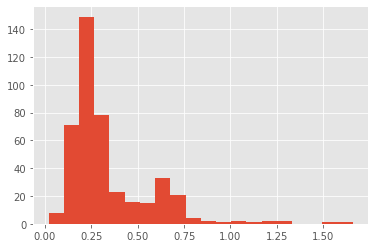

In [184]:
df_cer['error_rate'].hist(bins=20)

<AxesSubplot:>

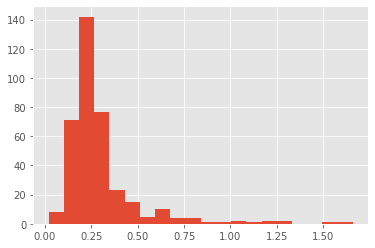

In [227]:
df_cer_noaek = df_cer.loc[(df_cer['ref']!='aek') & (df_cer['hyp']!='aek')].copy()
df_cer_noaek['error_rate'].hist(bins=20)

In [225]:
df_cer_noaek['error_rate'].describe()

count    370.000000
mean       0.295612
std        0.210577
min        0.018868
25%        0.187530
50%        0.234774
75%        0.313356
max        1.660304
Name: error_rate, dtype: float64

/home/graziul/.conda/envs/deepspeech/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


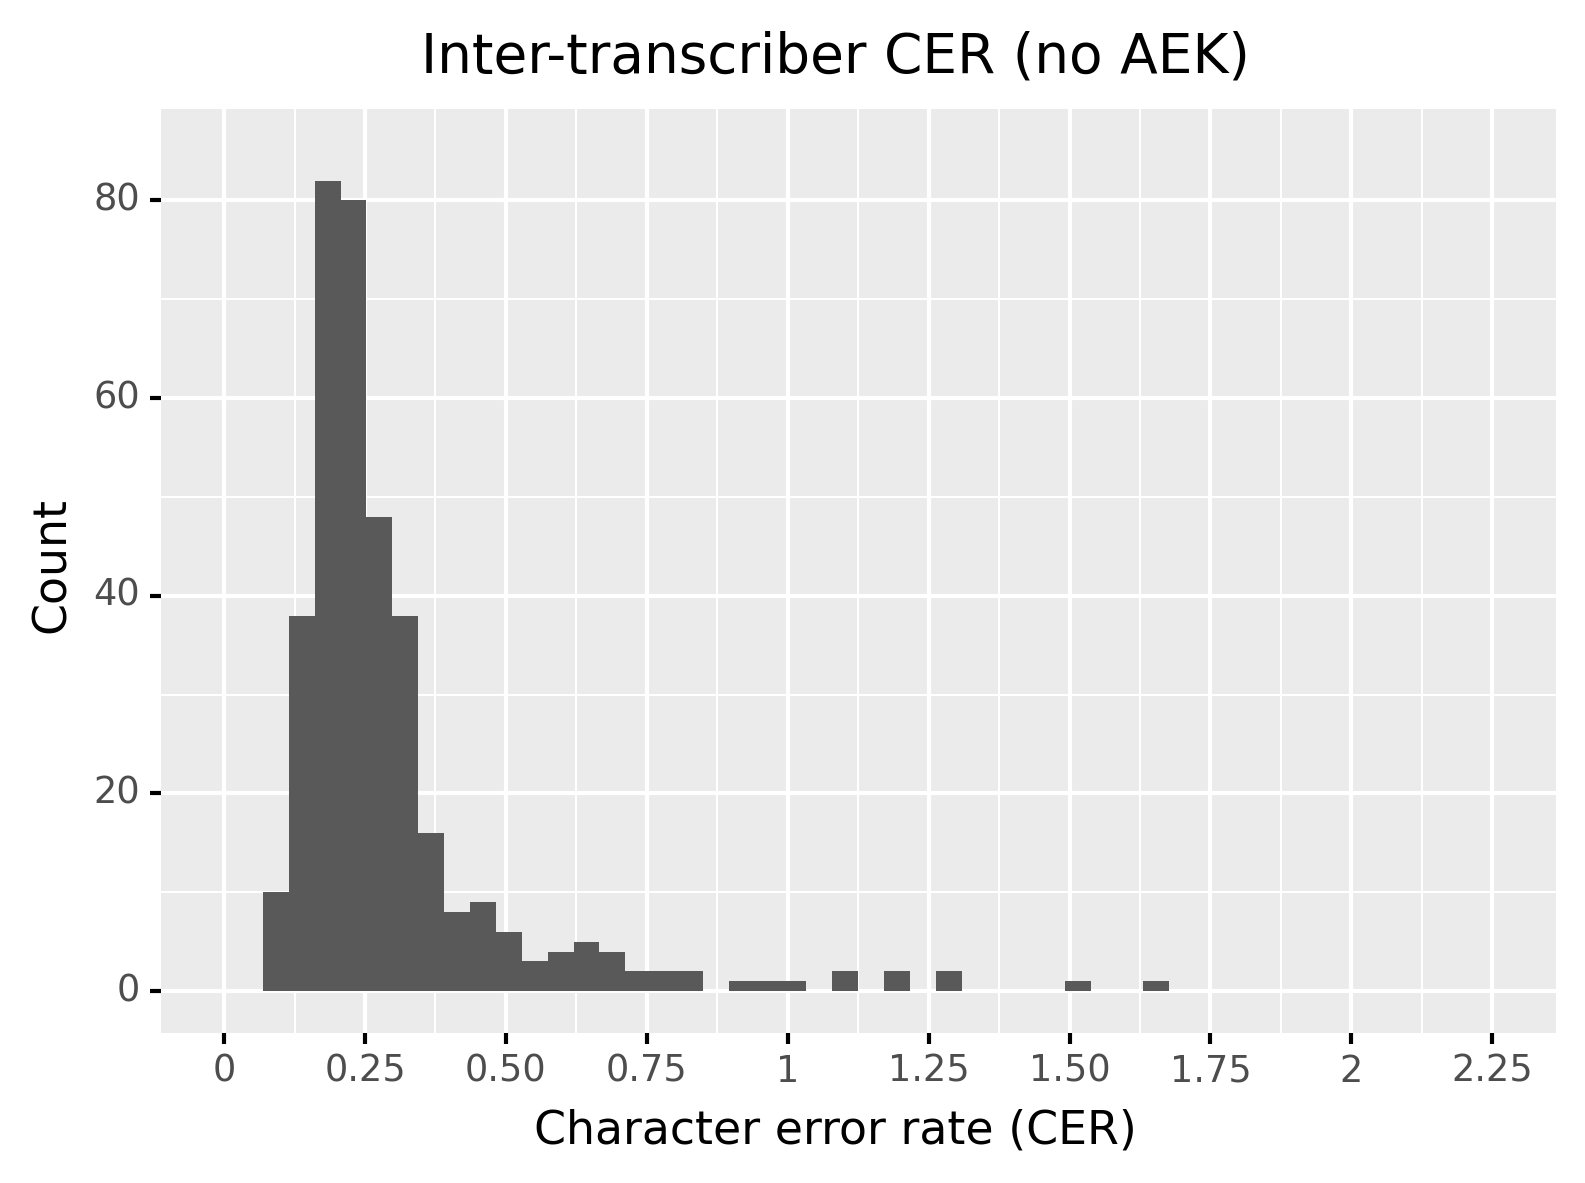

<ggplot: (8743615664113)>

In [234]:
q = ggplot(df_cer_noaek, aes(x='error_rate')) + xlab('Character error rate (CER)') + ylab('Count') + ggtitle('Inter-transcriber CER (no AEK)')
q + geom_histogram(bins=50) + scale_y_continuous(limits=(0,85)) + theme(figure_size=(6,4),
                                    dpi=300) + scale_x_continuous(breaks=[i/4 for i in range(0,21)], limits=(0,2.25))

In [67]:
#df_transcripts['tclean'] = df_transcripts['transcription'].apply(remove_irrelevant)

In [131]:
#df_transcripts.loc[df_transcripts['transcriber']=='aek','tclean'].tolist()

In [132]:
#df_transcripts.loc[df_transcripts['transcriber']=='kjc','tclean'].tolist()

In [69]:
wer_list = []
for f in filenames:
    df_temp = df_transcripts[df_transcripts['filename']==f]
    transcribers = df_temp['transcriber'].unique()
    if len(transcribers)>1:
        for t in set(permutations(transcribers,2)):
            zone = df_temp['zone'].unique()[0]
            month = df_temp['month'].unique()[0]
            day = df_temp['day'].unique()[0]
            time = df_temp['time'].unique()[0]
            df_temp['text'] = df_temp['transcription'].apply(remove_irrelevant)
            t1 = df_temp[df_temp['transcriber']==t[0]]
            t2 = df_temp[df_temp['transcriber']==t[1]]
            wer_list.append([t[0],t[1], wer([i for i in '#'.join(t1['text'].tolist())], [i for i in '#'.join(t2['text'].tolist())]), zone, month, day, time, f])

/home/graziul/ipykernel_3697005/653538430.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['text'] = df_temp['transcription'].apply(remove_irrelevant)


In [70]:
df_wer = pd.DataFrame(wer_list, columns = ['ref','hyp','wer','zone','month','day','time','filename'])
df_wer.to_csv('intertranscriber_wer.csv',index=False)
df_wer.describe()

,wer,month,day,time
count,430.000000,430.0,430.000000,430.000000
mean,0.337433,8.0,8.930233,849.413953
std,0.228615,0.0,3.116954,779.125510
min,0.018868,8.0,4.000000,1.000000
25%,0.193165,8.0,5.000000,139.000000
50%,0.248559,8.0,10.000000,555.000000
75%,0.391274,8.0,12.000000,1551.500000
max,1.660304,8.0,13.000000,2357.000000


<AxesSubplot:>

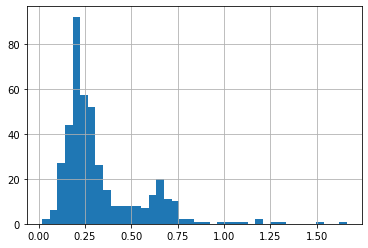

In [71]:
df_wer['wer'].hist(bins=40)

<AxesSubplot:>

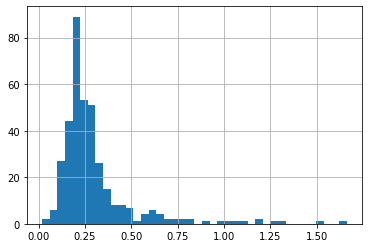

In [72]:
no_aek = (df_wer['ref']!='aek') & (df_wer['hyp']!='aek')
df_wer.loc[no_aek,'wer'].hist(bins=40)

In [73]:
df_wer.loc[no_aek,'wer'].describe()

count    370.000000
mean       0.295612
std        0.210577
min        0.018868
25%        0.187530
50%        0.234774
75%        0.313356
max        1.660304
Name: wer, dtype: float64

ref
_xz    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
aek    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
ah     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
ahs    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
his    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
jar    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
kjc    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
kk     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
kw     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
mcm    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
mgw    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
mh     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
oaa    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
rah    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
rc     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
sj     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
tjs    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
wam    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
wpd    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

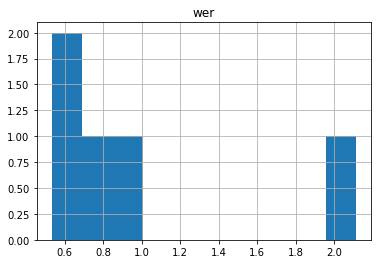

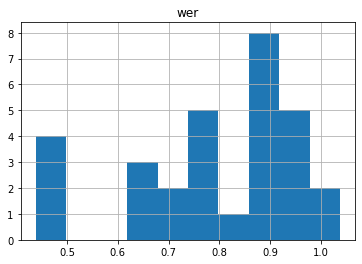

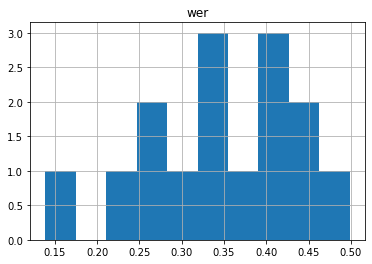

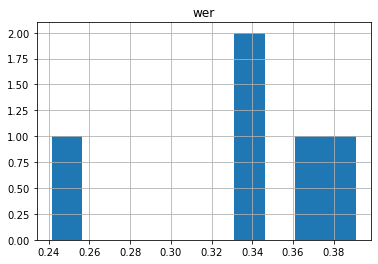

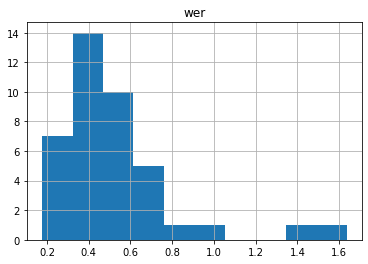

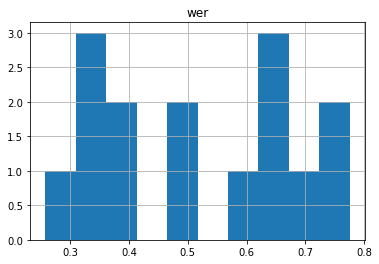

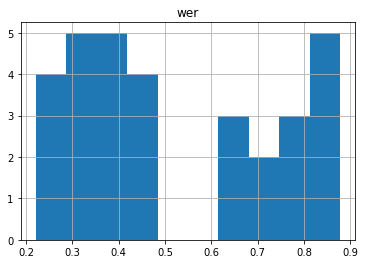

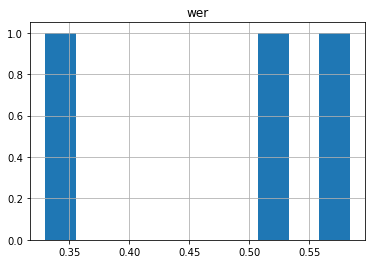

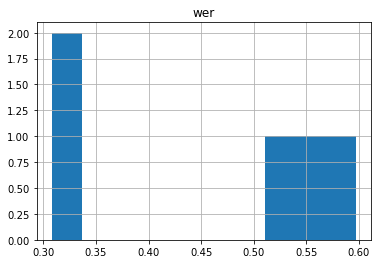

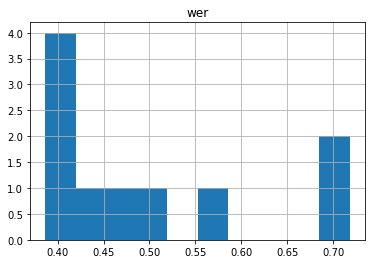

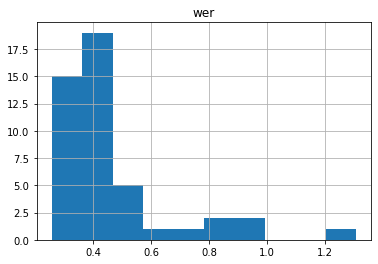

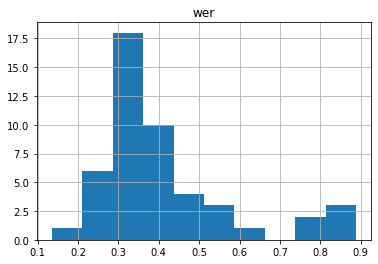

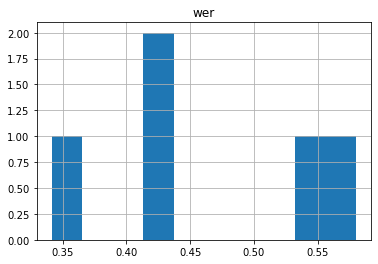

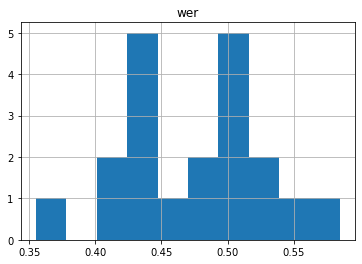

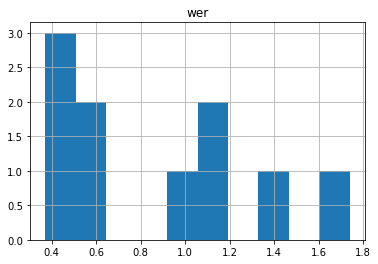

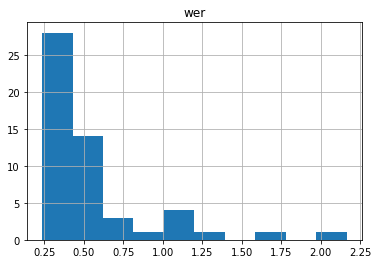

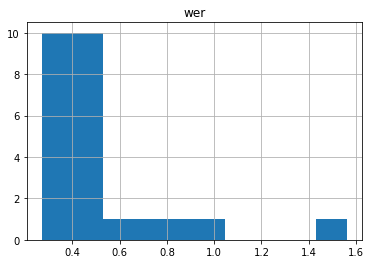

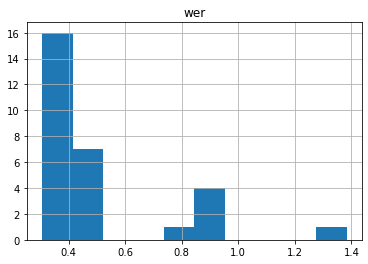

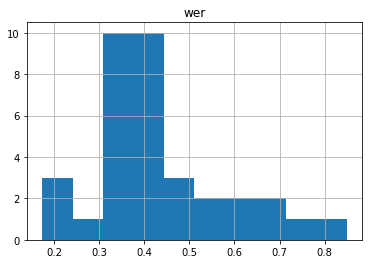

In [40]:
df_wer[['ref','wer']].groupby('ref').hist()

In [41]:
df_temp['transcriber'].unique()

array(['ahs'], dtype=object)

In [ ]:
df_temp

In [ ]:
for s in set(permutations(df_temp['transcriber'].unique(),2)):
    print(s[0],s[1])

In [43]:
f1 = pd.read_excel('transcripts/aekim22/Zone1/201808042331-339616-27730aek.xlsx')
f1.head()

,RECORDING,SPEAKER,TIME.START,TIME.END,TRANSCRIPTION,NOTES
0,REC1-2018_08_05,S05-01,00.00.34.954,00.00.37.423,SIXTEEN TWENTY TWO ROBERT,"S1: OPERATOR, WOMAN, MIDWEST ACCIDENT"
1,REC1-2018_08_05,S05-02,00.00.40.000,00.00.46.945,FORTY FIVE TO ELEVEN ON MONITOR LOUD MUSIC IN ...,"S10: 5374, MAN"
2,REC1-2018_08_05,S05-03,00.01.11.143,00.01.13.086,SEVENTEEN TWENTY FOUR ROBERT,"S11: 1624, MAN"
3,REC1-2018_08_05,S05-04,00.01.15.781,00.01.21.454,RESIDENTIAL ALARM FORTY THIRTY ONE PATTERSON [...,"S12: 1795, MAN"
4,REC1-2018_08_05,S05-05,00.01.33.644,00.01.35.360,SEVENTEEN THIRTEEN ROBERT,"S13: 1633, MAN"


In [44]:
f1['text'] = f1['TRANSCRIPTION'].str.replace('\[...\]','')
f1['text'] = f1['text'].str.replace('\[','')
f1['text'] = f1['text'].str.replace('\]','')
f1['text'].values

/home/graziul/ipykernel_3697005/2733913605.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  f1['text'] = f1['TRANSCRIPTION'].str.replace('\[...\]','')
/home/graziul/ipykernel_3697005/2733913605.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  f1['text'] = f1['text'].str.replace('\[','')
/home/graziul/ipykernel_3697005/2733913605.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  f1['text'] = f1['text'].str.replace('\]','')


array(['SIXTEEN TWENTY TWO ROBERT',
       'FORTY FIVE TO ELEVEN ON MONITOR LOUD MUSIC IN THE BACKYARD WILL YOU PLEASE SCREAM VERY LOUD IF YOU NEED HELP',
       'SEVENTEEN TWENTY FOUR ROBERT',
       'RESIDENTIAL ALARM FORTY THIRTY ONE PATTERSON POND? RESIDENCE FIRST FLOOR GLASS BREAK',
       'SEVENTEEN THIRTEEN ROBERT',
       "YOU WILL HAVE A NUMBER FOUR THAT'S IT",
       'SIXTEEN THIRTY FOUR ROBERT',
       'PERSON DOWN ON THIRTY SIX OH SIX LUNA JASON SAID WE GOT A PERSON DOWN IN THE ALLEY OVER THERE FIRE IS SUPPOSED TO BE ROLLING IT LOOKS LIKE GOT MUCH CALLS FROM THE WHOLE NEIGHBORHOOD ON HIM',
       'SEVENTEEN TWENTY THREE ROBERT YOUR CASE HUN? IS STILL CALLING',
       'SIXTEEN FOURTEEN ROBERT',
       'YEAH YOU GUYS SLIDE DOWN  ON THE THIRTY TWO HUNDRED BLOCK TO THE PACIFIC FOR THE BLOCK PARTY IS STILL GOING THE DEEJAY IS PLAYING THEIR MUSIC TOO LOUD',
       'ELEVEN ROBERT', 'TWENTY THREE ROBERT', 'FIVE THREE SEVEN FOUR',
       'SIXTEEN THIRTY THREE ROBERT', 'ONE SIX THREE

In [45]:
f2 = pd.read_excel('transcripts/kjcoleman/Zone1/201808042331-339616-27730kjc.xlsx')
f2.head()

,SID,Rec,Start,End,Transcription,Notes
0,Sid-0001,Rec1-2018_08_05,00.00.35.399,00.00.36.827,Sixteen Twenty Two Robert,NaN
1,Sid-0002,Rec1-2018_08_05,00.00.38.058,00.00.38.719,Twenty Two,NaN
2,Sid-0001,Rec1-2018_08_05,00.00.40.054,00.00.45.546,Forty Five Eleven On Monitor Loud Music In The...,NaN
3,Sid-0001,Rec1-2018_08_05,00.01.11.192,00.01.12.702,Seventeen Twenty Four Robert,NaN
4,Sid-0003,Rec1-2018_08_05,00.01.14.095,00.01.14.791,Twenty Four Robert,NaN


In [46]:
f2['Transcription'].values

array(['Sixteen Twenty Two Robert', 'Twenty Two',
       'Forty Five Eleven On Monitor Loud Music In The Backyard Will You Please Scream Very Loud If You Need Help',
       'Seventeen Twenty Four Robert', 'Twenty Four Robert',
       'Residential Alarm Forty Thirty One Patterson. Thomas Residence.  First Floor.  Glass Break.',
       '[Noise] Ten Four', '[Six] Twenty Three Robert',
       'Seventeen Thirteen Robert',
       '[Can You Put Us Down For A] [Uncertain] On [Uncertain] And Albany',
       'You Will Have A Number For It Thats It',
       'Sixteen Thirty Four Robert', '[Thirty] Four Robert',
       'Person Down On Thirty Six Oh Six Luna, Jason Said That He’s Got A Person Down In The Alley Over There. Fires Supposed To Be Rolling In It Looks Like, Gotten Lots Of Calls From The Whole Neighborhood On Him',
       '[Halfway There (or) Copy That]',
       'Seventeen Twenty Three Robert Your [Case Son] Is Still Calling',
       '[No]', 'Sixteen Fourteen Robert', 'Fourteen Robert',
  

In [47]:
f2['text'] = f2['Transcription'].str.replace("\[Uncertain\]","")
f2['text'] = f2['text'].str.replace('\[','')
f2['text'] = f2['text'].str.replace('\]','')
f2['text'] = f2['text'].str.upper()
f2['text'].values

/home/graziul/ipykernel_3697005/1834340971.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  f2['text'] = f2['Transcription'].str.replace("\[Uncertain\]","")
/home/graziul/ipykernel_3697005/1834340971.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  f2['text'] = f2['text'].str.replace('\[','')
/home/graziul/ipykernel_3697005/1834340971.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  f2['text'] = f2['text'].str.replace('\]','')


array(['SIXTEEN TWENTY TWO ROBERT', 'TWENTY TWO',
       'FORTY FIVE ELEVEN ON MONITOR LOUD MUSIC IN THE BACKYARD WILL YOU PLEASE SCREAM VERY LOUD IF YOU NEED HELP',
       'SEVENTEEN TWENTY FOUR ROBERT', 'TWENTY FOUR ROBERT',
       'RESIDENTIAL ALARM FORTY THIRTY ONE PATTERSON. THOMAS RESIDENCE.  FIRST FLOOR.  GLASS BREAK.',
       'NOISE TEN FOUR', 'SIX TWENTY THREE ROBERT',
       'SEVENTEEN THIRTEEN ROBERT',
       'CAN YOU PUT US DOWN FOR A  ON  AND ALBANY',
       'YOU WILL HAVE A NUMBER FOR IT THATS IT',
       'SIXTEEN THIRTY FOUR ROBERT', 'THIRTY FOUR ROBERT',
       'PERSON DOWN ON THIRTY SIX OH SIX LUNA, JASON SAID THAT HE’S GOT A PERSON DOWN IN THE ALLEY OVER THERE. FIRES SUPPOSED TO BE ROLLING IN IT LOOKS LIKE, GOTTEN LOTS OF CALLS FROM THE WHOLE NEIGHBORHOOD ON HIM',
       'HALFWAY THERE (OR) COPY THAT',
       'SEVENTEEN TWENTY THREE ROBERT YOUR CASE SON IS STILL CALLING',
       'NO', 'SIXTEEN FOURTEEN ROBERT', 'FOURTEEN ROBERT',
       'HAVE YOU GUYS FLIED (OR) SLIDE

In [59]:
wer([i for i in '#'.join(f1['text'].tolist())], [i for i in '#'.join(f2['text'].tolist())]) 

0.6339485941003967

In [49]:
wer('#'.join(f2['text'].tolist()), '#'.join(f1['text'].tolist())) 

0.7979704797047971

In [58]:
[i for i in '#'.join(f1['text'].tolist())]

['S',
 'I',
 'X',
 'T',
 'E',
 'E',
 'N',
 ' ',
 'T',
 'W',
 'E',
 'N',
 'T',
 'Y',
 ' ',
 'T',
 'W',
 'O',
 ' ',
 'R',
 'O',
 'B',
 'E',
 'R',
 'T',
 '#',
 'F',
 'O',
 'R',
 'T',
 'Y',
 ' ',
 'F',
 'I',
 'V',
 'E',
 ' ',
 'T',
 'O',
 ' ',
 'E',
 'L',
 'E',
 'V',
 'E',
 'N',
 ' ',
 'O',
 'N',
 ' ',
 'M',
 'O',
 'N',
 'I',
 'T',
 'O',
 'R',
 ' ',
 'L',
 'O',
 'U',
 'D',
 ' ',
 'M',
 'U',
 'S',
 'I',
 'C',
 ' ',
 'I',
 'N',
 ' ',
 'T',
 'H',
 'E',
 ' ',
 'B',
 'A',
 'C',
 'K',
 'Y',
 'A',
 'R',
 'D',
 ' ',
 'W',
 'I',
 'L',
 'L',
 ' ',
 'Y',
 'O',
 'U',
 ' ',
 'P',
 'L',
 'E',
 'A',
 'S',
 'E',
 ' ',
 'S',
 'C',
 'R',
 'E',
 'A',
 'M',
 ' ',
 'V',
 'E',
 'R',
 'Y',
 ' ',
 'L',
 'O',
 'U',
 'D',
 ' ',
 'I',
 'F',
 ' ',
 'Y',
 'O',
 'U',
 ' ',
 'N',
 'E',
 'E',
 'D',
 ' ',
 'H',
 'E',
 'L',
 'P',
 '#',
 'S',
 'E',
 'V',
 'E',
 'N',
 'T',
 'E',
 'E',
 'N',
 ' ',
 'T',
 'W',
 'E',
 'N',
 'T',
 'Y',
 ' ',
 'F',
 'O',
 'U',
 'R',
 ' ',
 'R',
 'O',
 'B',
 'E',
 'R',
 'T',
 '#',
 'R',
 'E',
 'S'